# FIFA 2019 D'EA SPORTS - ANALYSE EXPLORATOIRE


# Résumé du code

`Étape 1 : Trouver les données`

`Étape 2 : Importer les données`

`Étape 3 : Exploration des données à travers de questions simple`
   - Étape 3a : Quelle est la distribution de l'âge des joueurs?
   - Étape 3b : Quelles sont les nationalités des joueurs?
   - Étape 3c : Quels pays forment les meilleurs joueurs?
    
`Étape 4 : Visualisations diverse`

`Étape 5 : Classement des joueurs selon le rating`
   - Étape 5a : Classement des joueurs selon le rating (suite)
    
`Étape 6 : Visualisations des paliers (data set réduit`
   - Création d'un diagramme avec la provenance des meilleurs joueurs (niveau gold)
   - Création d'un diagramme avec la provenance des meilleurs joueurs (niveau silver)
   - Création d'un diagramme avec la provenance des meilleurs joueurs (niveau bronze)
    
`Étape 7 : Visualisation des paliers (data set complet`
   - Création d'un diagramme avec la provenance des meilleurs joueurs (niveau gold)
   - Création d'un diagramme avec la provenance des meilleurs joueurs (niveau silver)
   - Création d'un diagramme avec la provenance des meilleurs joueurs (niveau bronze)
    
`Étape 8 : Indice de la densité du potentiel par pay`
   - Étape 8a : Indice de la densité du potentiel par pays (data set réduit)
   - Étape 8b : Indice de la densité du potentiel par pays (data set complet)


# Étape 1 : Trouver les données

Les données ont été scraped du site So FIFA et répertoriées sur le site Kaggle. Je souhaitais travailler sur l'édition la plus récente du jeu, mais les données sur celle-ci sont incomplètes. L'édition 2019 regroupe des attributs détaillés pour chacun des joueurs présents dans l'édition du jeu FIFA 2019 commercialisé par EA Sports. 

# Étape 2 : Importer les données

Nous allons utiliser le module `Pandas` pour importer les données dans un DataFrame.

In [7]:
# On importe le module pandas
import pandas as pd

# On importe les données
df_data = pd.read_csv('data.csv')

# Procédure test pour voir si le DataFrame a été créé 
df_data.head(5)


,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


Je vais maintenant déterminer qu'elles sont les variables qui nous intéressent le plus. 

Nous avons deux questions auxquelles nous souhaitons répondre à la fin de cette analyse exploratoire.

- Assumant que les données sur FIFA 2019 reflètent la réalité, de quels pays proviennent les meilleurs joueurs?
- Quelle serait l'équipe parfaite à avoir pour joueur à FIFA 2021?

In [8]:
# Voir les différentes variables du jeu de données
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

# Étape 3 : Exploration des données à travers de questions simples

Pour commencer, j'aimerais explorer l'ensemble des données. Quelle est la moyenne d'âge, comment sont distribués les joueurs selon leur origine, leur FC, leur position, leur overall rating, etc. Je vais utiliser le module `Pandas`, `Seaborn` et `Matplotlib.Pyplot` pour se familiariser avec les données.

In [9]:
# On importe les modules seaborn, pandas et matplotlib.pyplot
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Étape 3a : Quelle est la distribution de l'âge des joueurs?

Je vais débuter par regarder la distribution de l'âge des joueurs sur l'ensemble des données dans le jeu. 

Je voulais, dans cette partie, savoir quel était la distribution de l’âge des joueurs dans FIFA 2019.

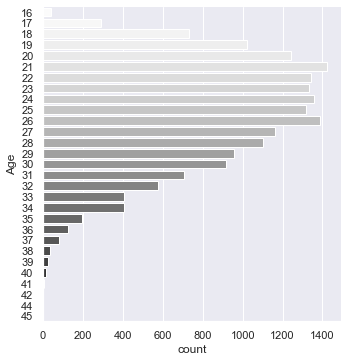

In [20]:
# Distribution de l'âge des joueurs - Countplot
sns.set(rc={"figure.figsize": (20, 10)})
ax = sns.catplot(kind ='count', y ='Age', data = df_data, palette = 'Greys')

À l’aide du `countplot`, nous avons pu remarquer que les joueurs de 20 ans sont les plus nombreux. Suivi de très près par les joueurs âgés de 21,26,24,22,23 et 25 ans. Cela nous prouve que les joueurs sont dans l’ensemble jeunes. En dessous de 21 ans, la fréquence des joueurs diminue drastiquement. La fréquence diminue encore plus pour les joueurs plus vieux (en haut de 32 ans). On peut assumer que les footballeurs prennent leur retraite à partir de 30-32 ans. 

# Étape 3b : Quelles sont les nationalités des joueurs?

Je vais maintenant regarder la distribution de la nationalité des joueurs sur l'ensemble des données dans le jeu. 

J'ai fait un `DataFrame` avec le module `Pandas`pour représenter ceci.

In [21]:
# Nombre de joueurs dans chaque pays
data3 = df_data['Nationality'].value_counts()
pd.set_option('display.max_rows', 200)

data3


England                 1662
Germany                 1198
Spain                   1072
Argentina                937
France                   914
Brazil                   827
Italy                    702
Colombia                 618
Japan                    478
Netherlands              453
Sweden                   397
China PR                 392
Chile                    391
Republic of Ireland      368
Mexico                   366
United States            353
Poland                   350
Norway                   341
Saudi Arabia             340
Denmark                  336
Korea Republic           335
Portugal                 322
Turkey                   303
Austria                  298
Scotland                 286
Belgium                  260
Australia                236
Switzerland              220
Uruguay                  149
Senegal                  130
Wales                    129
Croatia                  126
Serbia                   126
Nigeria                  121
Ghana         

# Étape 3c : Quels pays forme les meilleurs joueurs

Je vais maintenant regarder de quel pays proviennent les meilleurs joueurs en créant un tableau avec la moyenne du `Overall Rating` et le pays (`Nationality`).

In [22]:
# Quel pays forme les meilleurs joueurs 
data2 = df_data.groupby(['Nationality'])[['Overall']].mean()
resultat = data2.sort_values(by=['Overall','Nationality'], ascending=False)
resultat

,Overall
Nationality,
United Arab Emirates,77.000000
Central African Rep.,73.333333
Israel,72.142857
São Tomé & Príncipe,72.000000
Oman,72.000000
Dominican Republic,72.000000
Cape Verde,71.631579
Portugal,71.344720
Togo,71.333333


# Étape 3d : Sélection des données que pour les pays regroupant plus d'un certain nombre de joueurs

On peut voir que dans le tableau précédent les U.A.E. rassemblent les meilleurs joueurs. Mais est-ce véridique? On peut voir avec le tableau réalisé à l'étape 3b que certains pays ont plus de 1000 joueurs tandis que d'autres en possèdent que 2. C'est donc normal que les résultats soient faussés. Je vais donc considérer que les pays avec un nombre représentatif de joueurs pour le reste de nos analyses.

In [30]:
# 100 JOUEURS PAR PAYS

# On importe le module pandas
import pandas as pd

n_list = ['England','Germany','Spain','Argentina','France','Brazil','Italy','Colombia','Japan','Netherlands','Sweden','China PR',
          'Chile','Republic of Ireland','Mexico','United States','Poland' ,'Norway' ,'Saudi Arabia','Denmark','Korea Republic',
          'Portugal','Turkey','Austria','Scotland','Belgium' ,'Australia','Switzerland','Uruguay','Senegal','Wales','Serbia' ,
          'Croatia' ,'Nigeria' ,'Ghana' ,'Greece' ,'Ivory Coast' ,'Czech Republic']

# On importe les données
df_data2 = pd.read_csv('data.csv')

# On détermine les pays à garder
df_data3 = df_data2[df_data2['Nationality'].isin(['England','Germany','Spain','Argentina','France','Brazil','Italy','Colombia','Japan','Netherlands','Sweden','China PR',
          'Chile','Republic of Ireland','Mexico','United States','Poland' ,'Norway' ,'Saudi Arabia','Denmark','Korea Republic',
          'Portugal','Turkey','Austria','Scotland','Belgium' ,'Australia','Switzerland','Uruguay','Senegal','Wales','Serbia' ,
          'Croatia' ,'Nigeria' ,'Ghana' ,'Greece' ,'Ivory Coast' ,'Czech Republic'])]

# Retirer la variable Unnamed : 0
df_data3 = df_data3.drop(['Unnamed: 0'], axis = 1)
df_data3


,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,https://cdn.sofifa.org/teams/2/light/121.png,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18203,243165,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,Trelleborgs FF,https://cdn.sofifa.org/teams/2/light/703.png,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
18204,241638,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,Cambridge United,https://cdn.sofifa.org/teams/2/light/1944.png,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K
18205,246268,D. Walker-Rice,17,https://cdn.sofifa.org/players/4/19/246268.png,England,https://cdn.sofifa.org/flags/14.png,47,66,Tranmere Rovers,https://cdn.sofifa.org/teams/2/light/15048.png,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K


In [29]:
# 350 JOUEURS PAR PAYS

# On importe le module pandas
import pandas as pd

n_list2 = ['England','Germany','Spain','Argentina','France','Brazil','Italy','Colombia','Japan','Netherlands','Sweden','China PR',
          'Chile','Republic of Ireland','Mexico','United States','Poland']

# On importe les données
df_data4 = pd.read_csv('data.csv')

# On détermine les pays à garder
df_data5 = df_data4[df_data4['Nationality'].isin(['England','Germany','Spain','Argentina','France','Brazil','Italy','Colombia','Japan','Netherlands','Sweden','China PR',
          'Chile','Republic of Ireland','Mexico','United States','Poland'])]

# Retirer la variable Unnamed : 0
df_data5 = df_data5.drop(['Unnamed: 0'], axis = 1)
df_data5


,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
8,155862,Sergio Ramos,32,https://cdn.sofifa.org/players/4/19/155862.png,Spain,https://cdn.sofifa.org/flags/45.png,91,91,Real Madrid,https://cdn.sofifa.org/teams/2/light/243.png,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,€104.6M
10,188545,R. Lewandowski,29,https://cdn.sofifa.org/players/4/19/188545.png,Poland,https://cdn.sofifa.org/flags/37.png,90,90,FC Bayern München,https://cdn.sofifa.org/teams/2/light/21.png,...,86.0,34.0,42.0,19.0,15.0,6.0,12.0,8.0,10.0,€127.1M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,https://cdn.sofifa.org/teams/2/light/121.png,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18203,243165,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,Trelleborgs FF,https://cdn.sofifa.org/teams/2/light/703.png,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
18204,241638,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,Cambridge United,https://cdn.sofifa.org/teams/2/light/1944.png,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K
18205,246268,D. Walker-Rice,17,https://cdn.sofifa.org/players/4/19/246268.png,England,https://cdn.sofifa.org/flags/14.png,47,66,Tranmere Rovers,https://cdn.sofifa.org/teams/2/light/15048.png,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K


In [28]:
# 450 JOUEURS PAR PAYS

# On importe le module pandas
import pandas as pd

n_list3 = ['England','Germany','Spain','Argentina','France','Brazil','Italy','Colombia','Japan','Netherlands']

# On importe les données
df_data6 = pd.read_csv('data.csv')

# On détermine les pays à garder
df_data_reduit = df_data4[df_data4['Nationality'].isin(['England','Germany','Spain','Argentina','France','Brazil','Italy','Colombia','Japan','Netherlands'])]

# Retirer la variable Unnamed : 0
df_data_reduit = df_data_reduit.drop(['Unnamed: 0'], axis = 1)
df_data_reduit

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
8,155862,Sergio Ramos,32,https://cdn.sofifa.org/players/4/19/155862.png,Spain,https://cdn.sofifa.org/flags/45.png,91,91,Real Madrid,https://cdn.sofifa.org/teams/2/light/243.png,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,€104.6M
11,182521,T. Kroos,28,https://cdn.sofifa.org/players/4/19/182521.png,Germany,https://cdn.sofifa.org/flags/21.png,90,90,Real Madrid,https://cdn.sofifa.org/teams/2/light/243.png,...,85.0,72.0,79.0,69.0,10.0,11.0,13.0,7.0,10.0,€156.8M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18198,242844,J. Livesey,18,https://cdn.sofifa.org/players/4/19/242844.png,England,https://cdn.sofifa.org/flags/14.png,47,70,Burton Albion,https://cdn.sofifa.org/teams/2/light/15015.png,...,34.0,15.0,11.0,13.0,46.0,52.0,58.0,42.0,48.0,€165K
18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,https://cdn.sofifa.org/teams/2/light/121.png,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18204,241638,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,Cambridge United,https://cdn.sofifa.org/teams/2/light/1944.png,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K
18205,246268,D. Walker-Rice,17,https://cdn.sofifa.org/players/4/19/246268.png,England,https://cdn.sofifa.org/flags/14.png,47,66,Tranmere Rovers,https://cdn.sofifa.org/teams/2/light/15048.png,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K


Après plusieurs essais j'ai décidé de considérer que les pays avec plus de 450 joueurs. Je vais continuer mon analyse avec ce jeu de données réduit.

# Étape 4 : Visualisations diverses #

Je vais maintenant faire des visualisations pour voir la distribution ou la relation entre divers variables.

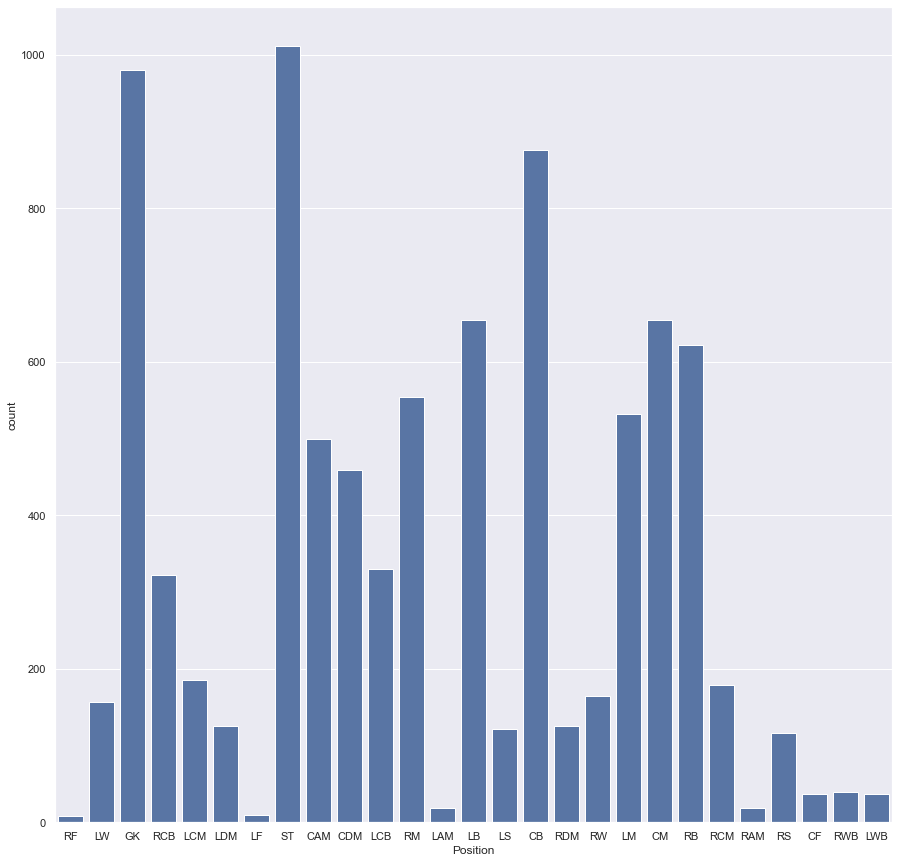

In [34]:
# Distribution des joueurs selon leur position

# Fréquence
df_data_reduit['Position'].value_counts()

# Graphique
f, ax = plt.subplots(figsize=(15, 15))
sns.countplot(x="Position", data=df_data_reduit, color="b")
plt.show()

On peut voir ici que la position `ST` (striker) est celle qui compte le plus de joueurs. La position `GK` (goal keepers) est aussi très proche de la fréquence de celle-ci.

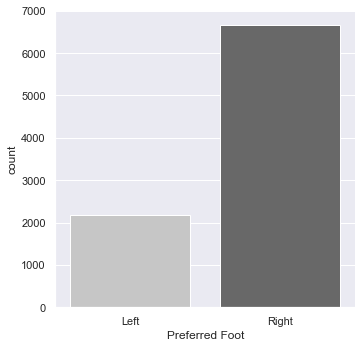

In [35]:
# Pied préféré des joueurs

# Graphique
pied = sns.catplot(x="Preferred Foot", kind="count", palette="Greys", data=df_data_reduit)

On peut voir ici que la grande majorité des joueurs préfèrent le pied droit.

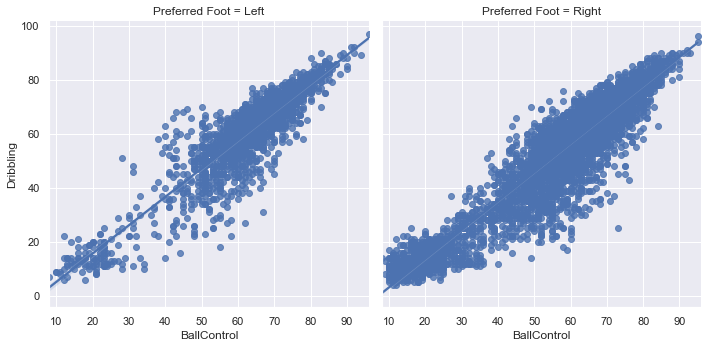

In [36]:
# Comparaison de la performance entre les joueurs gauchers et droitiers.
# Les deux variables mise en relation sont Ballcontrol et Dribbling

sns.lmplot(x = 'BallControl', y = 'Dribbling', data = df_data_reduit, col = 'Preferred Foot')
plt.show()

Le module `Seaborn` ne nous permet pas d'avoir l'équation linéaire des deux graphiques. Je ne peux donc pas affirmer statistiquement qu'un des deux groupes de joueurs est meilleur que l'autre. Par contre, a vu d'oeil, on peut penser que les joueurs droitiers sont plus performants.

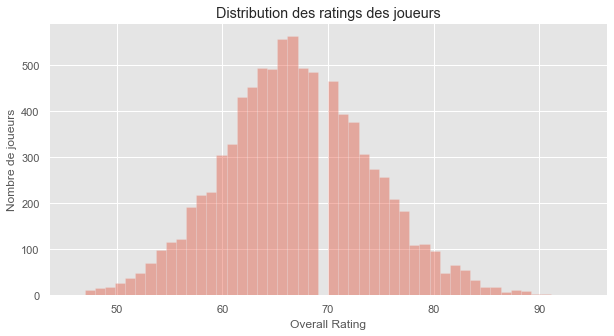

In [37]:
# La distribution des overall rating des joueurs

x = df_data_reduit.Overall
plt.figure(figsize = (10,5))
plt.style.use('ggplot')

ax = sns.distplot(x, kde = False)
ax.set_xlabel(xlabel = "Overall Rating")
ax.set_ylabel(ylabel = 'Nombre de joueurs')
ax.set_title(label = 'Distribution des ratings des joueurs')
plt.show()

On peut voir ici que la majorité `overall rating` des joueurs se retrouvent entre 60 et 70%.

In [38]:
# Les meilleurs joueurs pour chaque position selon leur overall rating 
# (en incluant leur âge, leur club et leur nationalité)

df_data.iloc[df_data.groupby(df_data['Position'])['Overall'].idxmax()][['Position', 'Name', 'Age', 'Club', 'Nationality', 'Overall']]

,Position,Name,Age,Club,Nationality,Overall
17,CAM,A. Griezmann,27,Atlético Madrid,France,89
12,CB,D. Godín,32,Atlético Madrid,Uruguay,90
20,CDM,Sergio Busquets,29,FC Barcelona,Spain,89
271,CF,Luis Alberto,25,Lazio,Spain,82
67,CM,Thiago,27,FC Bayern München,Spain,86
3,GK,De Gea,27,Manchester United,Spain,91
28,LAM,J. Rodríguez,26,FC Bayern München,Colombia,88
35,LB,Marcelo,30,Real Madrid,Brazil,88
24,LCB,G. Chiellini,33,Juventus,Italy,89
11,LCM,T. Kroos,28,Real Madrid,Germany,90


In [39]:
# 10 meilleurs joueurs gauchers selon le Overall Rating

df_data[df_data['Preferred Foot'] == 'Left'][['Name', 'Age', 'Club', 'Nationality','Overall']].head(10)

,Name,Age,Club,Nationality,Overall
0,L. Messi,31,FC Barcelona,Argentina,94
13,David Silva,32,Manchester City,Spain,90
15,P. Dybala,24,Juventus,Argentina,89
17,A. Griezmann,27,Atlético Madrid,France,89
19,T. Courtois,26,Real Madrid,Belgium,89
24,G. Chiellini,33,Juventus,Italy,89
26,M. Salah,26,Liverpool,Egypt,88
28,J. Rodríguez,26,FC Bayern München,Colombia,88
35,Marcelo,30,Real Madrid,Brazil,88
36,G. Bale,28,Real Madrid,Wales,88


In [40]:
# 10 meilleurs joueurs droitier selon le Overall Rating

df_data[df_data['Preferred Foot'] == 'Right'][['Name', 'Age', 'Club', 'Nationality','Overall']].head(10)

,Name,Age,Club,Nationality,Overall
1,Cristiano Ronaldo,33,Juventus,Portugal,94
2,Neymar Jr,26,Paris Saint-Germain,Brazil,92
3,De Gea,27,Manchester United,Spain,91
4,K. De Bruyne,27,Manchester City,Belgium,91
5,E. Hazard,27,Chelsea,Belgium,91
6,L. Modrić,32,Real Madrid,Croatia,91
7,L. Suárez,31,FC Barcelona,Uruguay,91
8,Sergio Ramos,32,Real Madrid,Spain,91
9,J. Oblak,25,Atlético Madrid,Slovenia,90
10,R. Lewandowski,29,FC Bayern München,Poland,90


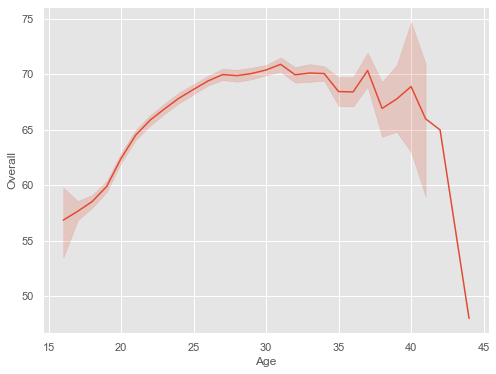

In [41]:
# Relation entre Age et Overall

f, ax = plt.subplots(figsize=(8, 6))
ax = sns.lineplot(x="Age", y="Overall", data=df_data_reduit)
plt.show()

Le graphique sous-entend que plus l'âge est élévé, plus le overall rating est élevé, sauf après 35 ans, où les joueurs plus âgés perdent des points drastiquement.

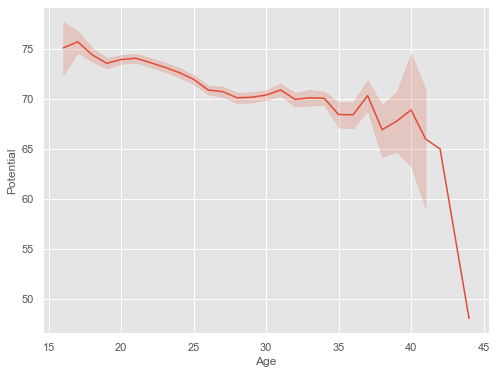

In [42]:
# Relation entre Age et Potentiel

f, ax = plt.subplots(figsize=(8, 6))
ax = sns.lineplot(x="Age", y="Potential", data=df_data_reduit)
plt.show()

Le graphique sous-entend que plus l'âge est élévé, plus le potentiel rating décline, notamment après 40 ans, où les joueurs plus âgés perdent des points drastiquement.

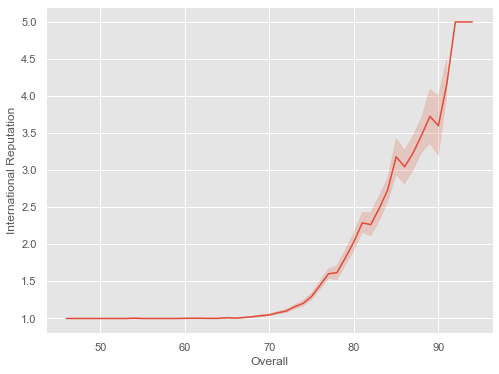

In [43]:
# Relation entre Overall et International Reputation

f, ax = plt.subplots(figsize=(8, 6))
ax = sns.lineplot(x="Overall", y="International Reputation", data=df_data)
plt.show()

Le graphique sous-entend que plus le overall rating est élévé, plus la réputation internationale l'est aussi. La relation semble être exponentielle. Nous pensons que ce phénomène peut s'expliquer par le fait que plus un joueur est bon, plus il sera connu et aimé à travers le monde.

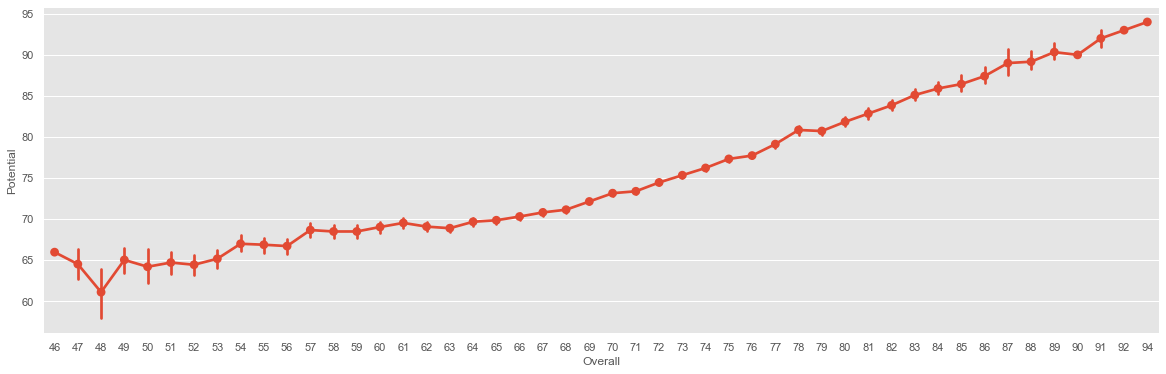

In [44]:
# Relation entre le potentiel des joueurs et le overall rating

f, ax = plt.subplots(figsize=(20, 6))
sns.pointplot(x="Overall", y="Potential", data=df_data_reduit)
plt.show()

Le graphique sous-entend qu'il y a une relation linéaire positive entre le overall rating et le potentiel d'un joueur.

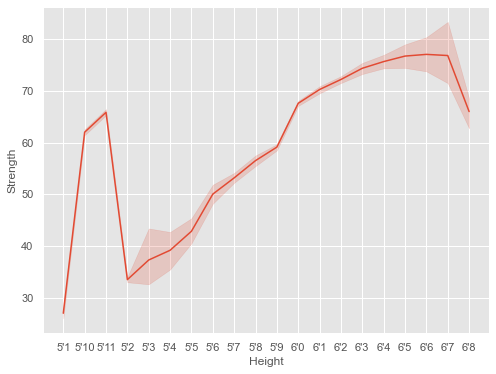

In [45]:
# Relation entre Height et Strength

f, ax = plt.subplots(figsize=(8, 6))
ax = sns.lineplot(x="Height", y="Strength", data=df_data_reduit)
plt.show()

Le graphique sous-entend qu'il y a une relation linéaire positive entre le Height et le Strength d'un joueur. À noter qu'ici les données pour les joueurs de 5"10 et 5"11 sont mal placées dans le graphiques se qui fausse la tendance.

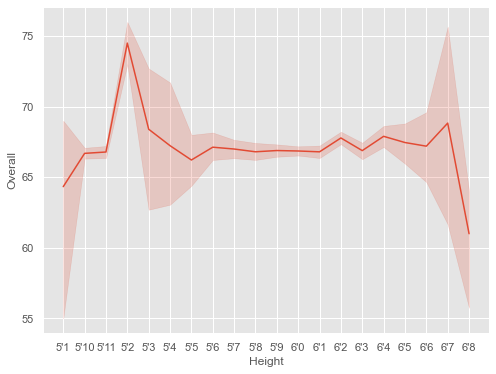

In [46]:
# Relation entre Height et Overall

f, ax = plt.subplots(figsize=(8, 6))
ax = sns.lineplot(x="Height", y="Overall", data=df_data_reduit)
plt.show()

Nous ne pouvons pas conclure qu'il y a une relation entre les variables Height et Overall. À noter qu'ici les données pour les joueurs de 5"10 et 5"11 sont mal placées dans le graphiques se qui fausse la visualisation.

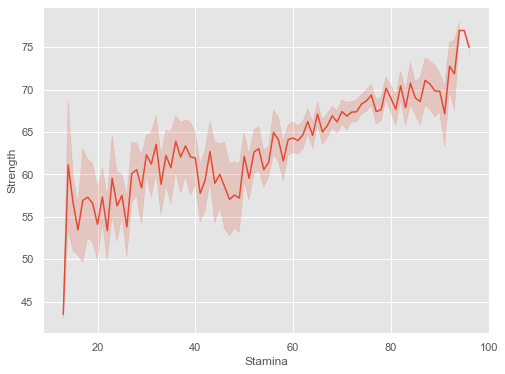

In [47]:
# Relation entre Strength et Stamina

f, ax = plt.subplots(figsize=(8, 6))
ax = sns.lineplot(x="Stamina", y="Strength", data=df_data_reduit)
plt.show()

Le graphique sous-entend que plus le stamina est élévé, plus le strength l'est aussi.

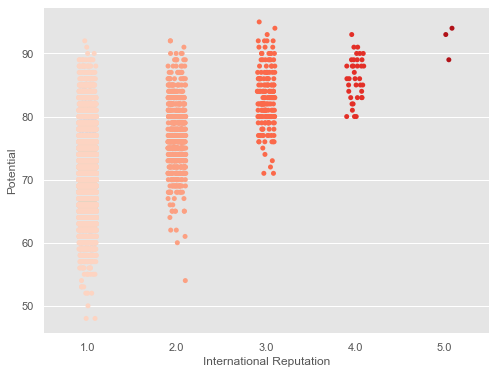

In [48]:
# Potentiel selon la réputation internationale

f, ax = plt.subplots(figsize=(8, 6))
sns.stripplot(x="International Reputation", y="Potential", palette = 'Reds', data=df_data_reduit)
plt.show()

Le graphique montre le nombre de joueurs par classe de réputation internationale selon le potentiel. On peut voir ici que beaucoup de joueurs ont une basse réputation internationale et ce peut importe le potentiel, tandis que les joueurs qui ont un score de 5 de réputation internationale ont les potentiels les plus élevés.

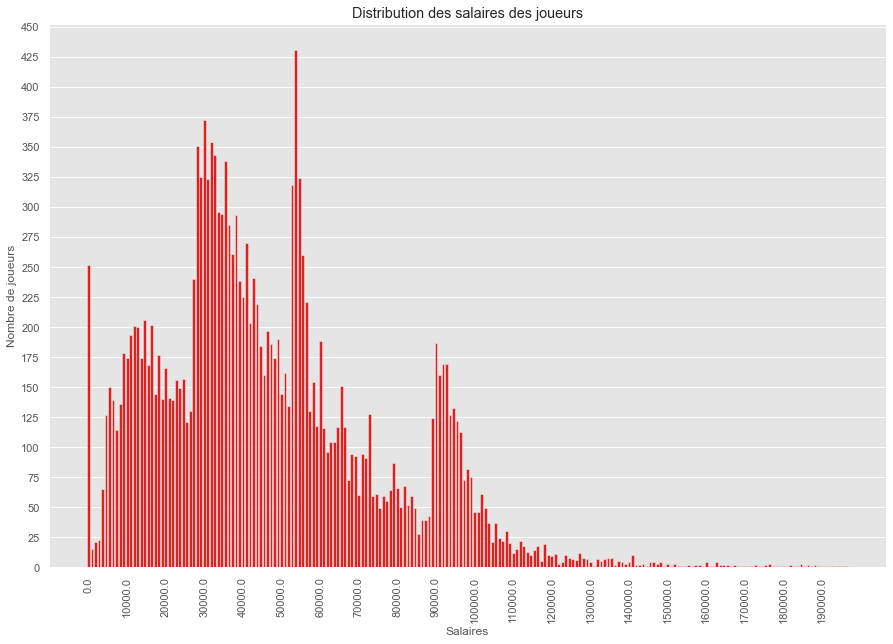

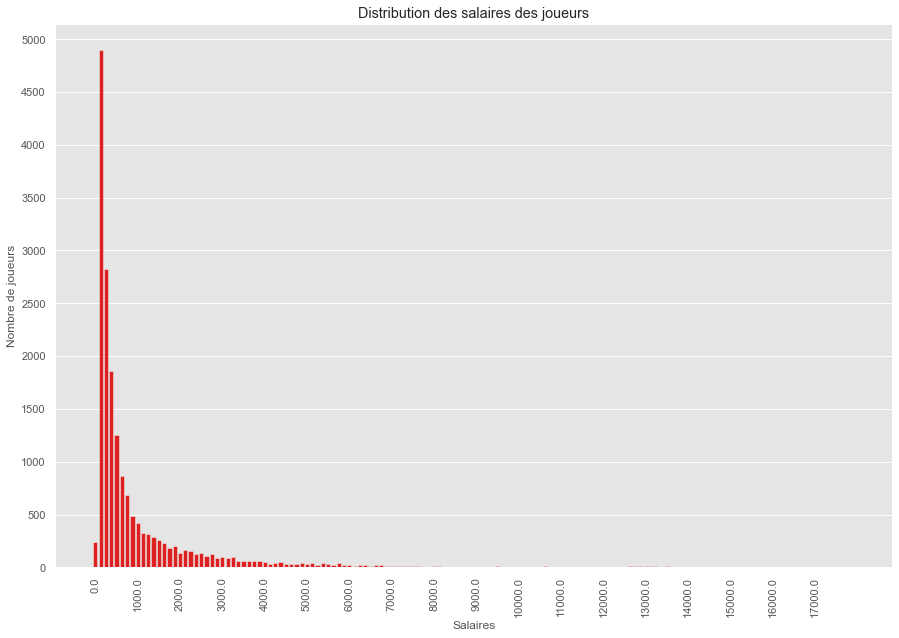

In [49]:
# Salaire des joueurs - sur l'ensemble des données (jeu initial)

data_salaire = pd.read_csv('data.csv')

# Fonction pour clean-up les données
def conversion(Value):
    out = Value.replace('€', '')
    if 'M' in out:
        out = float(out.replace('M', ''))*1000000
    elif 'K' in Value:
        out = float(out.replace('K', ''))*1000
    return float(out)

# Appliquer la fonction aux données wage
data_salaire['Value'] = data_salaire['Value'].apply(lambda x: conversion(x))
data_salaire['Wage'] = data_salaire['Wage'].apply(lambda x: conversion(x))
data_salaire['Wage'].head()

# Distribution des salaires avec la variable Value

plt.rcParams['figure.figsize'] = (15, 10)
sns.countplot(data_salaire['Value'], color = 'red')
plt.xlabel('Salaires')
plt.ylabel('Nombre de joueurs')
plt.title('Distribution des salaires des joueurs')
plt.locator_params(nbins=20)
plt.xticks(rotation = 90)
plt.show()

# Distribution des salaires avec la variable Wage

plt.rcParams['figure.figsize'] = (15, 10)
sns.countplot(data_salaire['Wage'], color = 'red')
plt.xlabel('Salaires')
plt.ylabel('Nombre de joueurs')
plt.title('Distribution des salaires des joueurs')
plt.locator_params(nbins=20)
plt.xticks(rotation = 90)
plt.show()

Le graphique sous-entend que la majorité des joueurs ont des salaires entre 60 000 et 70 000$, tandis que qu'un petit groupe accède aux gros montants dans les millions.

# Étape 5 : Classement des joueurs selon leur rating #

Je vais maintenant faire un classement des joueurs selon leur `Overall Rating`. Je vais regrouper les joueurs selon 4 classes en créant une nouvelle variable nommée `Classe`.

Je vais créer un `boxplot`ou une `boite à moustache` pour déterminer nos quatre classes. 

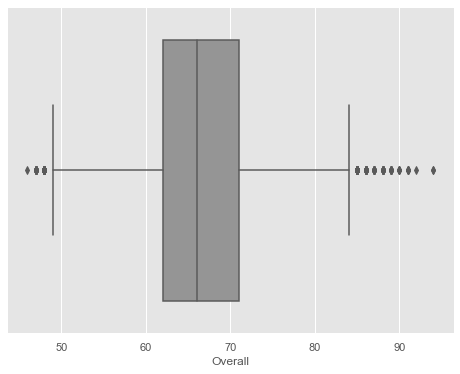

In [50]:
# Boxplot du overall des joueurs
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=df_data["Overall"], palette = 'Greys')
plt.show()

# Étape 5a : Classement des joueurs selon leur rating (suite)#

Je trouvais que les classes n'étaient pas représentatives, donc j'ai décidé de faire 3 classes inspirées par les niveaux or, argent et bronze du jeu FIFA 2019. 

- Classe 1 (GOLD) : `75% à 100%`
- Classe 2 (SILVER) : `65% à 74%`
- Classe 3 (BRONZE) : `40% à 64%`

In [52]:
# GOLD

# On importe le module pandas
import pandas as pd

df_gold = df_data_reduit[df_data_reduit['Overall'] > 75]
df_gold


,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
8,155862,Sergio Ramos,32,https://cdn.sofifa.org/players/4/19/155862.png,Spain,https://cdn.sofifa.org/flags/45.png,91,91,Real Madrid,https://cdn.sofifa.org/teams/2/light/243.png,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,€104.6M
11,182521,T. Kroos,28,https://cdn.sofifa.org/players/4/19/182521.png,Germany,https://cdn.sofifa.org/flags/21.png,90,90,Real Madrid,https://cdn.sofifa.org/teams/2/light/243.png,...,85.0,72.0,79.0,69.0,10.0,11.0,13.0,7.0,10.0,€156.8M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,212219,A. Djiku,23,https://cdn.sofifa.org/players/4/19/212219.png,France,https://cdn.sofifa.org/flags/18.png,76,82,Stade Malherbe Caen,https://cdn.sofifa.org/teams/2/light/210.png,...,66.0,75.0,76.0,77.0,11.0,7.0,9.0,10.0,11.0,€19.8M
1566,190717,M. Antonio,28,https://cdn.sofifa.org/players/4/19/190717.png,England,https://cdn.sofifa.org/flags/14.png,76,76,West Ham United,https://cdn.sofifa.org/teams/2/light/19.png,...,70.0,50.0,56.0,53.0,12.0,13.0,8.0,14.0,10.0,€15.2M
1567,199422,J. Clasie,27,https://cdn.sofifa.org/players/4/19/199422.png,Netherlands,https://cdn.sofifa.org/flags/34.png,76,77,Feyenoord,https://cdn.sofifa.org/teams/2/light/246.png,...,73.0,71.0,71.0,61.0,11.0,11.0,14.0,10.0,7.0,NaN
1568,220414,Diego Rico,25,https://cdn.sofifa.org/players/4/19/220414.png,Spain,https://cdn.sofifa.org/flags/45.png,76,80,Bournemouth,https://cdn.sofifa.org/teams/2/light/1943.png,...,64.0,60.0,77.0,76.0,10.0,9.0,15.0,11.0,10.0,€15.8M


In [53]:
# SILVER

# On importe le module pandas
import pandas as pd

df_silver = df_data_reduit[df_data_reduit['Overall'].isin(['64','65','66','67','68','69','70','71','72','73','74'])]
df_silver

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
2068,191488,L. Orbán,29,https://cdn.sofifa.org/players/4/19/191488.png,Argentina,https://cdn.sofifa.org/flags/52.png,74,74,Racing Club,https://cdn.sofifa.org/teams/2/light/101085.png,...,71.0,69.0,75.0,78.0,16.0,9.0,12.0,13.0,15.0,€6.6M
2071,221697,O. Watkins,22,https://cdn.sofifa.org/players/4/19/221697.png,England,https://cdn.sofifa.org/flags/14.png,74,81,Brentford,https://cdn.sofifa.org/teams/2/light/1925.png,...,54.0,40.0,46.0,36.0,14.0,14.0,14.0,6.0,10.0,€16.8M
2072,230401,Duirval Diniz,34,https://cdn.sofifa.org/players/4/19/230401.png,Brazil,https://cdn.sofifa.org/flags/54.png,74,74,Atlético Paranaense,https://cdn.sofifa.org/teams/2/light/1039.png,...,67.0,76.0,76.0,75.0,7.0,16.0,12.0,9.0,11.0,€3.2M
2073,197890,Arribas,29,https://cdn.sofifa.org/players/4/19/197890.png,Spain,https://cdn.sofifa.org/flags/45.png,74,74,U.N.A.M.,https://cdn.sofifa.org/teams/2/light/1881.png,...,66.0,72.0,74.0,70.0,12.0,15.0,7.0,9.0,16.0,€7.4M
2075,215042,G. Lezcano,31,https://cdn.sofifa.org/players/4/19/215042.png,Argentina,https://cdn.sofifa.org/flags/52.png,74,74,Monarcas Morelia,https://cdn.sofifa.org/teams/2/light/1028.png,...,75.0,18.0,18.0,18.0,7.0,11.0,14.0,8.0,9.0,€8.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12054,222973,M. Diakota,27,https://cdn.sofifa.org/players/4/19/222973.png,France,https://cdn.sofifa.org/flags/18.png,64,64,AS Béziers,https://cdn.sofifa.org/teams/2/light/113948.png,...,57.0,61.0,60.0,57.0,14.0,6.0,7.0,7.0,11.0,€831K
12055,224253,D. Parker,22,https://cdn.sofifa.org/players/4/19/224253.png,Germany,https://cdn.sofifa.org/flags/21.png,64,72,1. FSV Mainz 05,https://cdn.sofifa.org/teams/2/light/169.png,...,45.0,30.0,41.0,36.0,14.0,11.0,11.0,13.0,15.0,€1.4M
12059,239614,Jesús Areso,18,https://cdn.sofifa.org/players/4/19/239614.png,Spain,https://cdn.sofifa.org/flags/45.png,64,79,Athletic Club de Bilbao,https://cdn.sofifa.org/teams/2/light/448.png,...,51.0,41.0,64.0,65.0,7.0,10.0,13.0,12.0,14.0,€2.2M
12061,222463,O. Khan,21,https://cdn.sofifa.org/players/4/19/222463.png,England,https://cdn.sofifa.org/flags/14.png,64,70,Mansfield Town,https://cdn.sofifa.org/teams/2/light/1940.png,...,65.0,49.0,31.0,26.0,10.0,14.0,9.0,9.0,16.0,€1.2M


In [54]:
# BRONZE

# On importe le module pandas
import pandas as pd

df_bronze = df_data_reduit[df_data_reduit['Overall'].isin(['40','41','42','43','44','45','46','47','48','49','50','51','52','53','54','55','56','57','58','59','60','61','62','63'])]
df_bronze

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
12064,230912,P. Ghiglione,21,https://cdn.sofifa.org/players/4/19/230912.png,Italy,https://cdn.sofifa.org/flags/27.png,63,75,Frosinone,https://cdn.sofifa.org/teams/2/light/111657.png,...,53.0,55.0,62.0,59.0,7.0,13.0,7.0,7.0,14.0,NaN
12065,242176,J. Buitrago,25,https://cdn.sofifa.org/players/4/19/242176.png,Colombia,https://cdn.sofifa.org/flags/56.png,63,66,Patriotas Boyacá FC,https://cdn.sofifa.org/teams/2/light/112527.png,...,58.0,68.0,59.0,54.0,10.0,14.0,10.0,7.0,14.0,€570K
12067,244992,Gabriel Nunes,23,https://cdn.sofifa.org/players/4/19/244992.png,Brazil,https://cdn.sofifa.org/flags/54.png,63,67,Boavista FC,https://cdn.sofifa.org/teams/2/light/1898.png,...,58.0,58.0,62.0,64.0,14.0,10.0,7.0,10.0,14.0,€870K
12068,221953,B. Whitfield,22,https://cdn.sofifa.org/players/4/19/221953.png,England,https://cdn.sofifa.org/flags/14.png,63,69,Port Vale,https://cdn.sofifa.org/teams/2/light/1928.png,...,59.0,26.0,32.0,43.0,13.0,15.0,8.0,16.0,10.0,€975K
12071,236033,Dani Cárdenas,21,https://cdn.sofifa.org/players/4/19/236033.png,Spain,https://cdn.sofifa.org/flags/45.png,63,73,Levante UD,https://cdn.sofifa.org/teams/2/light/1853.png,...,42.0,13.0,13.0,12.0,60.0,62.0,58.0,55.0,69.0,€1M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18198,242844,J. Livesey,18,https://cdn.sofifa.org/players/4/19/242844.png,England,https://cdn.sofifa.org/flags/14.png,47,70,Burton Albion,https://cdn.sofifa.org/teams/2/light/15015.png,...,34.0,15.0,11.0,13.0,46.0,52.0,58.0,42.0,48.0,€165K
18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,https://cdn.sofifa.org/teams/2/light/121.png,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18204,241638,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,Cambridge United,https://cdn.sofifa.org/teams/2/light/1944.png,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K
18205,246268,D. Walker-Rice,17,https://cdn.sofifa.org/players/4/19/246268.png,England,https://cdn.sofifa.org/flags/14.png,47,66,Tranmere Rovers,https://cdn.sofifa.org/teams/2/light/15048.png,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K


# Étape 6 : Visualisations des paliers (data set réduit)

# Étape 6a : Création d'un diagramme avec la provenance des meilleurs joueurs (niveau gold)

J'essaie maintenant de créer une visualisation avec une vue sur l'ensemble du monde et qui met de l'avant les pays les plus intéressants à approcher en période de scouting. J'ai opté pour un diagramme à bandes de base, mais pour l'article j'opterais pour une map.

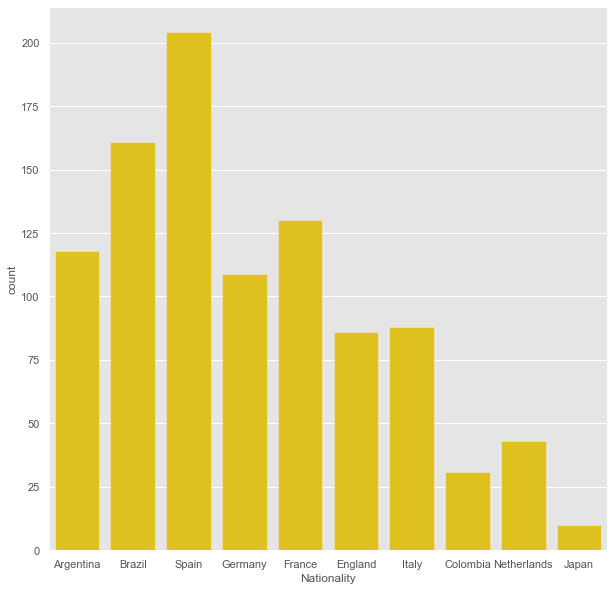

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importons les données sur les villes et les pays via geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Procédure test pour voir si tout a été importé
world.head(5)

# Renommer les noms des colonnes dans le DataFrame world pour faciliter la concaténation
world2 = world.rename(columns={"pop_est": "pop_est", "continent": "continent", "name":"Nationality", "iso_a3":"iso_a3", "gdp_md_est":"gdp_md_est", "geometry":"geometry"})

# Procédure test pour voir si tout a été modifié
world2.head(5)

# Concaténation des données pour créer une table avec l'information geometry
df_merged_gold = pd.merge(df_gold, world2, on = 'Nationality', how = 'inner')

# Procédure test pour voir si tout a été merged
df_merged_gold.head(5)

# Création d'un tableau avec le compte de joueurs par pays dans le niveau bronze
df_merged_gold.groupby(['continent'])['Nationality'].value_counts()

# Création d'un graphique avec le compte de joueurs par pays dans le niveau gold
gold = plt.subplots(figsize=(10,10))
sns.countplot(x="Nationality", data=df_gold, color = 'gold')
plt.show()



# Étape 6b : Création d'un diagramme avec la provenance des meilleurs joueurs (niveau silver)

Je crée maintenant une visualisation avec une vue sur l'ensemble du monde et qui met de l'avant les pays neutres à approcher en période de scouting.

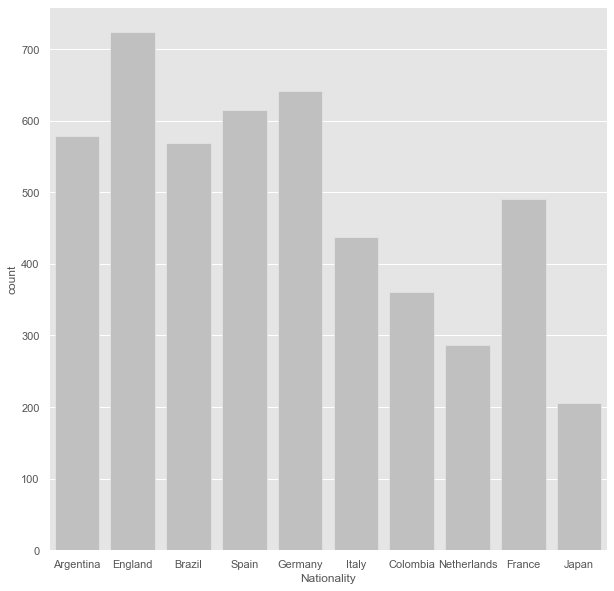

In [65]:
# Concaténation des données pour créer une table avec l'information geometry

df_merged_silver = pd.merge(df_silver, world2, on = 'Nationality', how = 'inner')

# Procédure test pour voir si tout a été merged
df_merged_silver.head(5)

# Création d'un tableau avec le compte de joueurs par pays dans le niveau bronze
df_merged_silver.groupby(['continent'])['Nationality'].value_counts()

# Création d'un graphique avec le compte de joueurs par pays dans le niveau gold
silver = plt.subplots(figsize=(10,10))
sns.countplot(x="Nationality", data=df_silver, color = 'silver')
plt.show()


# Étape 6c : Création d'un diagramme avec la provenance des meilleurs joueurs (niveau bronze)

Je crée maintenant une visualisation avec une vue sur l'ensemble du monde et qui met de l'avant les pays les moins intéressants à approcher en période de scouting.

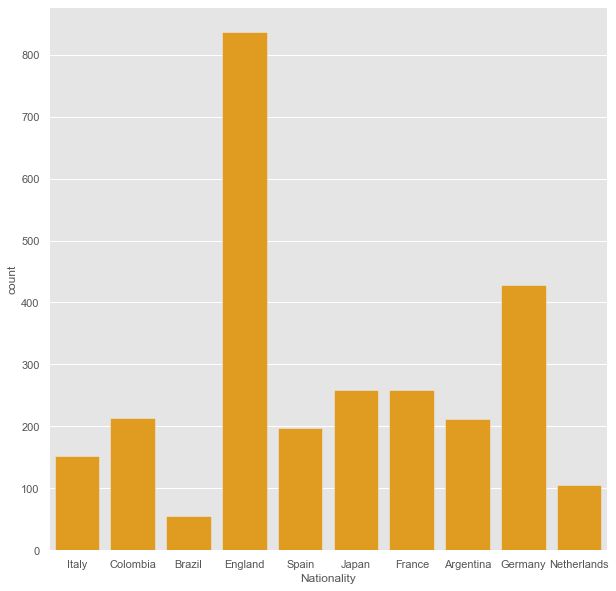

In [66]:
# Concaténation des données pour créer une table avec l'information geometry
df_merged_bronze = pd.merge(df_bronze, world2, on = 'Nationality', how = 'inner')

# Procédure test pour voir si tout a été merged
df_merged_bronze.head(5)

# Création d'un tableau avec le compte de joueurs par pays dans le niveau bronze
df_merged_bronze.groupby(['continent'])['Nationality'].value_counts()

# Création d'un graphique avec le compte de joueurs par pays dans le niveau gold
silver = plt.subplots(figsize=(10,10))
sns.countplot(x="Nationality", data=df_bronze, color = 'orange')
plt.show()

# Étape 7 : Visualisation des paliers (data set complet)

# Étape 7a : Création d'un diagramme avec l'ensemble des joueurs du data set initial (niveau or)

Créons maintenant une visualisation avec une vue sur l'ensemble du monde et qui met de l'avant les pays les plus intéressants à approcher en période de scouting. Cette visualisation inclut tous les pays.

Rappel des classes :
- Classe 1 (GOLD) : `75% à 100%`
- Classe 2 (SILVER) : `65% à 74%`
- Classe 3 (BRONZE) : `40% à 64%`

In [68]:
# GOLD

# On importe le module pandas
import pandas as pd

df_gold_complet = df_data[df_data['Overall'] > 75]
df_gold_complet

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1566,1566,190717,M. Antonio,28,https://cdn.sofifa.org/players/4/19/190717.png,England,https://cdn.sofifa.org/flags/14.png,76,76,West Ham United,...,70.0,50.0,56.0,53.0,12.0,13.0,8.0,14.0,10.0,€15.2M
1567,1567,199422,J. Clasie,27,https://cdn.sofifa.org/players/4/19/199422.png,Netherlands,https://cdn.sofifa.org/flags/34.png,76,77,Feyenoord,...,73.0,71.0,71.0,61.0,11.0,11.0,14.0,10.0,7.0,NaN
1568,1568,220414,Diego Rico,25,https://cdn.sofifa.org/players/4/19/220414.png,Spain,https://cdn.sofifa.org/flags/45.png,76,80,Bournemouth,...,64.0,60.0,77.0,76.0,10.0,9.0,15.0,11.0,10.0,€15.8M
1569,1569,176894,Mossoró,34,https://cdn.sofifa.org/players/4/19/176894.png,Brazil,https://cdn.sofifa.org/flags/54.png,76,76,Medipol Başakşehir FK,...,76.0,44.0,42.0,47.0,13.0,14.0,10.0,16.0,9.0,€7.4M


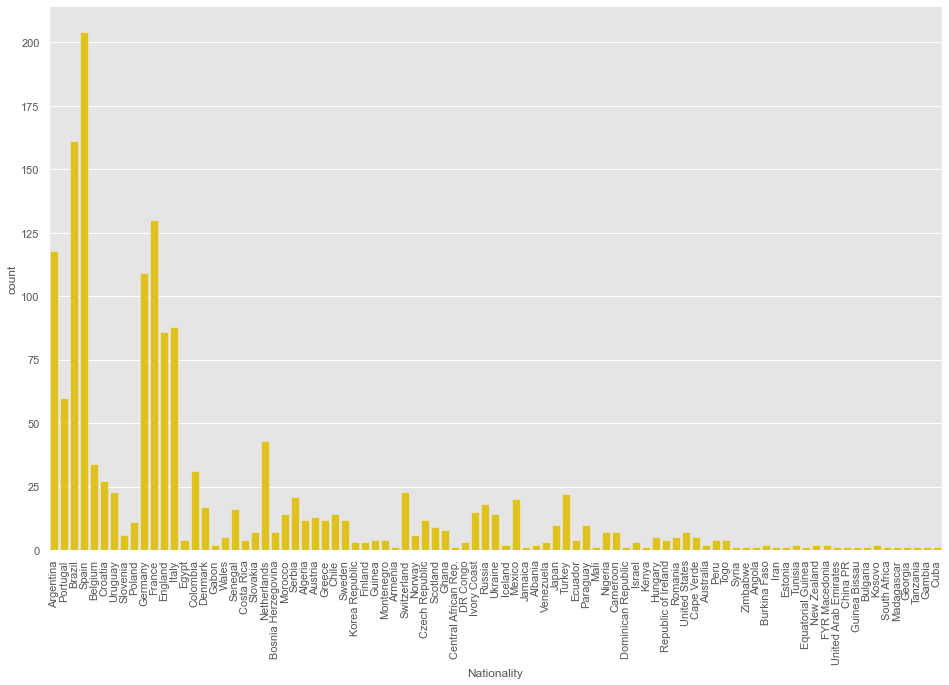

In [69]:
# Création d'un graphique avec le compte de joueurs par pays dans le niveau gold
gold_complet = plt.subplots(figsize=(16,10))
sns.countplot(x="Nationality", data=df_gold_complet, color = 'gold')
plt.xticks(rotation = 90)
plt.show()

On peut voir ici que les pays avec le plus de joueurs gold sont Spain et Brazil.

# Étape 7b : Création d'un diagramme avec l'ensemble des joueurs du data set initial (niveau silver)

Créons maintenant une visualisation avec une vue sur l'ensemble du monde et qui met de l'avant les pays les neutres à approcher en période de scouting. Cette visualisation inclut tous les pays.

Rappel des classes :
- Classe 1 (GOLD) : `75% à 100%`
- Classe 2 (SILVER) : `65% à 74%`
- Classe 3 (BRONZE) : `40% à 64%`

In [70]:
# SILVER

# On importe le module pandas
import pandas as pd

df_silver_complet = df_data[df_data['Overall'].isin(['64','65','66','67','68','69','70','71','72','73','74'])]
df_silver_complet

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
2068,2068,191488,L. Orbán,29,https://cdn.sofifa.org/players/4/19/191488.png,Argentina,https://cdn.sofifa.org/flags/52.png,74,74,Racing Club,...,71.0,69.0,75.0,78.0,16.0,9.0,12.0,13.0,15.0,€6.6M
2069,2069,213761,A. Hamdallah,27,https://cdn.sofifa.org/players/4/19/213761.png,Morocco,https://cdn.sofifa.org/flags/129.png,74,74,Al Nassr,...,66.0,29.0,16.0,17.0,9.0,11.0,9.0,15.0,10.0,€10.2M
2070,2070,220673,R. Tapia,22,https://cdn.sofifa.org/players/4/19/220673.png,Peru,https://cdn.sofifa.org/flags/59.png,74,79,Feyenoord,...,63.0,71.0,72.0,75.0,16.0,14.0,7.0,15.0,8.0,€9.6M
2071,2071,221697,O. Watkins,22,https://cdn.sofifa.org/players/4/19/221697.png,England,https://cdn.sofifa.org/flags/14.png,74,81,Brentford,...,54.0,40.0,46.0,36.0,14.0,14.0,14.0,6.0,10.0,€16.8M
2072,2072,230401,Duirval Diniz,34,https://cdn.sofifa.org/players/4/19/230401.png,Brazil,https://cdn.sofifa.org/flags/54.png,74,74,Atlético Paranaense,...,67.0,76.0,76.0,75.0,7.0,16.0,12.0,9.0,11.0,€3.2M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12058,12058,212990,C. Camps,22,https://cdn.sofifa.org/players/4/19/212990.png,Northern Ireland,https://cdn.sofifa.org/flags/35.png,64,70,Rochdale,...,64.0,53.0,59.0,60.0,11.0,9.0,8.0,16.0,11.0,€1.2M
12059,12059,239614,Jesús Areso,18,https://cdn.sofifa.org/players/4/19/239614.png,Spain,https://cdn.sofifa.org/flags/45.png,64,79,Athletic Club de Bilbao,...,51.0,41.0,64.0,65.0,7.0,10.0,13.0,12.0,14.0,€2.2M
12060,12060,200703,R. Siemaszko,31,https://cdn.sofifa.org/players/4/19/200703.png,Poland,https://cdn.sofifa.org/flags/37.png,64,64,Arka Gdynia,...,67.0,38.0,43.0,38.0,13.0,12.0,7.0,15.0,8.0,€540K
12061,12061,222463,O. Khan,21,https://cdn.sofifa.org/players/4/19/222463.png,England,https://cdn.sofifa.org/flags/14.png,64,70,Mansfield Town,...,65.0,49.0,31.0,26.0,10.0,14.0,9.0,9.0,16.0,€1.2M


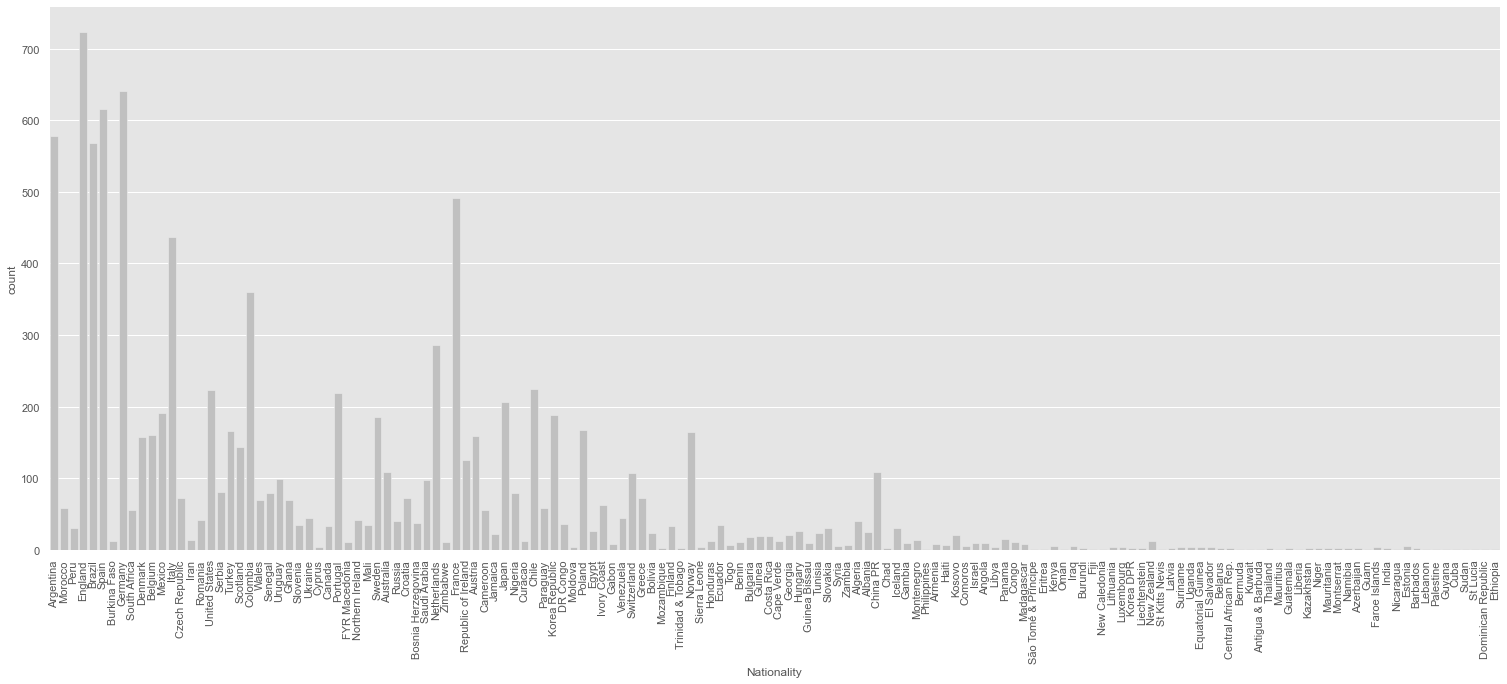

In [71]:
# Création d'un graphique avec le compte de joueurs par pays dans le niveau silver
silver_complet = plt.subplots(figsize=(26,10))
sns.countplot(x="Nationality", data=df_silver_complet, color = 'silver')
plt.xticks(rotation = 90)
plt.show()

On peut voir ici que les pays avec le plus de joueurs bronze sont England, France, Brazil, Spain et Germany.

# Étape 7c : Création d'un diagramme avec l'ensemble des joueurs du data set initial (niveau bronze)

Créons maintenant une visualisation avec une vue sur l'ensemble du monde et qui met de l'avant les pays les moins intéressants à approcher en période de scouting. Cette visualisation inclut tous les pays.

Rappel des classes :
- Classe 1 (GOLD) : `75% à 100%`
- Classe 2 (SILVER) : `65% à 74%`
- Classe 3 (BRONZE) : `40% à 64%`

In [72]:
# BRONZE

# On importe le module pandas
import pandas as pd

df_bronze_complet = df_data[df_data['Overall'].isin(['40','41','42','43','44','45','46','47','48','49','50','51','52','53','54','55','56','57','58','59','60','61','62','63'])]
df_bronze_complet

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
12063,12063,214272,P. Soto,23,https://cdn.sofifa.org/players/4/19/214272.png,Chile,https://cdn.sofifa.org/flags/55.png,63,73,Colo-Colo,...,59.0,16.0,14.0,15.0,64.0,61.0,62.0,63.0,64.0,€720K
12064,12064,230912,P. Ghiglione,21,https://cdn.sofifa.org/players/4/19/230912.png,Italy,https://cdn.sofifa.org/flags/27.png,63,75,Frosinone,...,53.0,55.0,62.0,59.0,7.0,13.0,7.0,7.0,14.0,NaN
12065,12065,242176,J. Buitrago,25,https://cdn.sofifa.org/players/4/19/242176.png,Colombia,https://cdn.sofifa.org/flags/56.png,63,66,Patriotas Boyacá FC,...,58.0,68.0,59.0,54.0,10.0,14.0,10.0,7.0,14.0,€570K
12066,12066,243456,B. White,22,https://cdn.sofifa.org/players/4/19/243456.png,United States,https://cdn.sofifa.org/flags/95.png,63,69,New York Red Bulls,...,55.0,36.0,45.0,42.0,10.0,11.0,10.0,9.0,5.0,€893K
12067,12067,244992,Gabriel Nunes,23,https://cdn.sofifa.org/players/4/19/244992.png,Brazil,https://cdn.sofifa.org/flags/54.png,63,67,Boavista FC,...,58.0,58.0,62.0,64.0,14.0,10.0,7.0,10.0,14.0,€870K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18203,18203,243165,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,Trelleborgs FF,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
18204,18204,241638,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,Cambridge United,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K
18205,18205,246268,D. Walker-Rice,17,https://cdn.sofifa.org/players/4/19/246268.png,England,https://cdn.sofifa.org/flags/14.png,47,66,Tranmere Rovers,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K


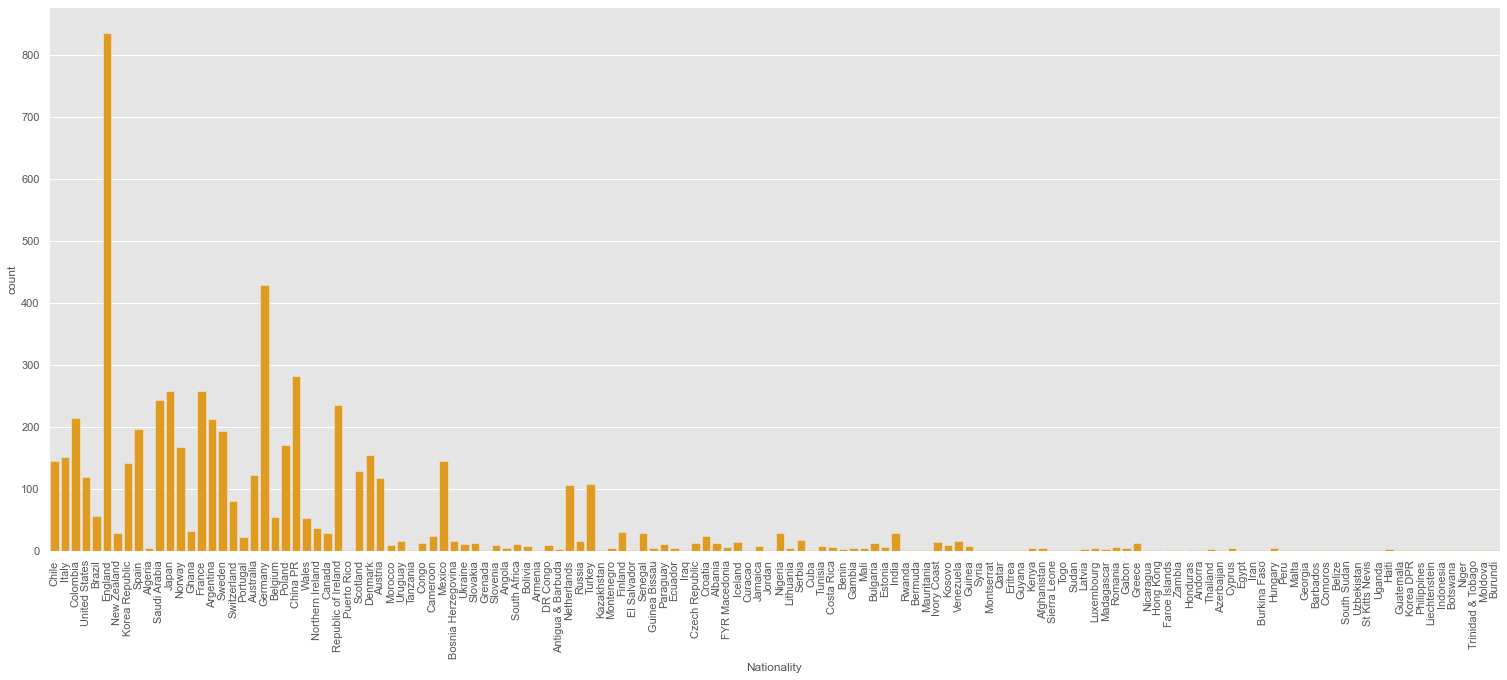

In [73]:
# Création d'un graphique avec le compte de joueurs par pays dans le niveau bronze
bronze_complet = plt.subplots(figsize=(26,10))
sns.countplot(x="Nationality", data=df_bronze_complet, color = 'orange')
plt.xticks(rotation = 90)
plt.show()

On peut voir ici que les pays avec le plus de joueurs bronze sont England et Germany.

# Étape 8 : Indice de la densité du potentiel par pays

Toute cette analyse exploratoire nous permet de nous poser une question ultime. Quels pays possèdent les meilleurs joueurs, mais en plus grande quantité? En effet, nous avons pu voir que certains pays ont un overall rating élevé, mais n'ont pas une grande quantité de joueurs. Afin de mesurer et comparer les pays entre eux, j'ai décidé de créer un indice de densité de talent qui suivra la formule suivante : `Somme de l'overall rating ÷ Nombre de joueurs`. Plus l'indice est bas, plus le pays est intéressant. Je vais faire cette analyse sur notre dataset réduit et par la suite sur l'ensemble du data set pour voir s'il y a des différences ou similarités.

# Étape 8a : Indice de la densité du potentiel par pays (data set réduit)

In [74]:
# Création d'une fonction pour trouver l'indice de densité du potentiel

def indice_de_potentiel(overall,nombre_joueurs):
    return sum(overall) // nombre_joueurs

a = df_data_reduit['Overall']
b = df_data_reduit['Nationality'].value_counts()

resultat = indice_de_potentiel(a,b)
print(resultat)

England         357
Germany         495
Spain           553
Argentina       633
France          649
Brazil          717
Italy           845
Colombia        960
Japan          1241
Netherlands    1309
Name: Nationality, dtype: int64


On remarque ici que les pays avec le plus de densité du potentiel sont England et Germany.

# Étape 8b : Indice de la densité du potentiel par pays (data set complet)


In [75]:
# Création d'une fonction pour trouver l'indice de densité du potentiel

def indice_de_potentiel(overall,nombre_joueurs):
    return sum(overall) // nombre_joueurs

a = df_data['Overall']
b = df_data['Nationality'].value_counts()

resultat = indice_de_potentiel(a,b)
print(resultat)

England                     725
Germany                    1006
Spain                      1125
Argentina                  1287
France                     1319
Brazil                     1458
Italy                      1717
Colombia                   1951
Japan                      2523
Netherlands                2662
Sweden                     3037
China PR                   3076
Chile                      3084
Republic of Ireland        3277
Mexico                     3295
United States              3416
Poland                     3445
Norway                     3536
Saudi Arabia               3547
Denmark                    3589
Korea Republic             3600
Portugal                   3745
Turkey                     3980
Austria                    4047
Scotland                   4216
Belgium                    4638
Australia                  5110
Switzerland                5481
Uruguay                    8094
Senegal                    9276
Wales                      9348
Croatia 

On remarque ici que les pays avec le plus de densité du potentiel sont England Germany, Spain, Argentina, France, Brazil, Italy et Colombia.

<img src="Screen Shot 2021-01-26 at 12.55.43 AM.png">